In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
dataset = pd.read_csv("/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv")
dataset.head(3)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...


In [3]:
# Convert pixel strings to arrays
dataset['pixels'] = dataset['pixels'].apply(lambda x: np.array(x.split(), dtype='float32'))


In [4]:

# Reshape the arrays to 3D tensors
dataset['pixels'] = dataset['pixels'].apply(lambda x: x.reshape(48, 48, 1))

# Scale the pixels
dataset['pixels'] = dataset['pixels'].apply(lambda x: x / 255)

In [5]:
dataset.shape

(23705, 5)

In [6]:
dataset.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [7]:
dataset.age.unique()

array([  1,  10, 100, 101, 103, 105,  11, 110, 111, 115, 116,  12,  13,
        14,  15,  16,  17,  18,  19,   2,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,   3,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,   4,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         5,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,   6,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,   7,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,   8,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,   9,  90,  91,  92,  93,  95,  96,  99])

In [8]:
dataset.ethnicity.unique()

array([2, 3, 4, 0, 1])

In [9]:
dataset.gender.unique()

array([0, 1])

In [10]:
print(sum(dataset.gender==0))##fairly balanced
print(sum(dataset.gender==1))

12391
11314


In [11]:
dataset

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[[[0.5058824], [0.5019608], [0.5019608], [0.49..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[[[0.6431373], [0.2901961], [0.43529412], [0.6..."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[[[0.2627451], [0.27450982], [0.2784314], [0.2..."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[[[0.75686276], [0.77254903], [0.7764706], [0...."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[[[0.7921569], [0.8039216], [0.81960785], [0.8..."
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,"[[[0.49803922], [0.39215687], [0.36862746], [0..."
23701,99,1,1,20170120134639935.jpg.chip.jpg,"[[[0.09019608], [0.10980392], [0.1254902], [0...."
23702,99,2,1,20170110182418864.jpg.chip.jpg,"[[[0.23137255], [0.19607843], [0.14509805], [0..."
23703,99,2,1,20170117195405372.jpg.chip.jpg,"[[[0.1764706], [0.42352942], [0.47058824], [0...."


In [12]:

    
# Extract features and labels
image = np.array(dataset['pixels'].tolist()).astype(np.float32)
age = np.array(dataset['age']).astype(np.float32)
ethnicity = np.array(dataset['ethnicity']).astype(np.float32)
gender = np.array(dataset['gender']).astype(np.float32)

In [13]:
image=np.array(image).astype(np.float32)

In [14]:
age=np.array(age).astype(np.float32)
ethnicity=np.array(ethnicity).astype(np.float32)
gender=np.array(gender).astype(np.float32)

In [15]:
from sklearn.preprocessing import OneHotEncoder
enc = LabelEncoder()
ethnicity = tf.keras.utils.to_categorical(enc.fit_transform(ethnicity))


In [16]:
print(image.shape)
print(age.shape)
print(ethnicity.shape)
print(gender.shape)

(23705, 48, 48, 1)
(23705,)
(23705, 5)
(23705,)


In [17]:
# Access the 'age' column
age = dataset['age'].values


In [18]:

# Split the data for age
x_train_age, x_test_age, age_y_train, age_y_test = train_test_split(image, age, test_size=0.2, random_state=42, shuffle=True)
x_train_age, x_val_age, age_y_train, age_y_val = train_test_split(x_train_age, age_y_train, test_size=0.25, random_state=42, shuffle=True)

# Split the data for ethnicity
x_train_ethnicity, x_test_ethnicity, ethnicity_y_train, ethnicity_y_test = train_test_split(image, ethnicity, test_size=0.2, random_state=42, shuffle=True)
x_train_ethnicity, x_val_ethnicity, ethnicity_y_train, ethnicity_y_val = train_test_split(x_train_ethnicity, ethnicity_y_train, test_size=0.25, random_state=42, shuffle=True)

# Split the data for gender
x_train_gender, x_test_gender, gender_y_train, gender_y_test = train_test_split(image, gender, test_size=0.2, random_state=42, shuffle=True)
x_train_gender, x_val_gender, gender_y_train, gender_y_val = train_test_split(x_train_gender, gender_y_train, test_size=0.25, random_state=42, shuffle=True)

In [19]:
len(x_train_age)

14223

In [20]:
len(x_test_age)

4741

In [21]:
print(len(age_y_train))
print(len(ethnicity_y_train))
print(len(gender_y_train))

14223
14223
14223


In [22]:
gender_y_train

array([1., 1., 0., ..., 1., 0., 0.], dtype=float32)

In [23]:
type(age)
#print(gender.shape)


numpy.ndarray

In [24]:
##Building the modle
age=tf.keras.models.Sequential()##to start the model


In [25]:
type(age)
#print(gender.shape)


keras.engine.sequential.Sequential

In [26]:
# Create a Sequential model
age = tf.keras.Sequential()

# First convolutional layer
age.add(tf.keras.layers.Conv2D(filters=64, activation='relu', kernel_size=3, input_shape=[48, 48, 1]))

# Pooling layer
age.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))

# Second convolutional layer
age.add(tf.keras.layers.Conv2D(filters=128, activation='relu', kernel_size=3))

# Pooling layer
age.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))

# Third convolutional layer
age.add(tf.keras.layers.Conv2D(filters=256, activation='relu', kernel_size=3))

# Pooling layer
age.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))

# Flatten the result
age.add(tf.keras.layers.Flatten())

# First fully connected layer
age.add(tf.keras.layers.Dense(units=1024, activation='relu'))

# Second fully connected layer
age.add(tf.keras.layers.Dense(units=512, activation='relu'))

# Output layer
age.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [27]:
#import tensorflow as tf
#from tensorflow.keras.callbacks import EarlyStopping

#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [28]:
##compile the model
age.compile(optimizer='adam',loss='mean_squared_error',metrics = ['mse'])

In [29]:
age.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 256)       

In [30]:
age_model = age.fit(
    x_train_age, age_y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_val_age, age_y_val),
)

Epoch 1/30
445/445 [==============================] - 79s 176ms/step - loss: 366.3131 - mse: 366.3131 - val_loss: 290.8677 - val_mse: 290.8677
Epoch 2/30
445/445 [==============================] - 79s 177ms/step - loss: 180.1095 - mse: 180.1095 - val_loss: 138.4828 - val_mse: 138.4828
Epoch 3/30
445/445 [==============================] - 78s 176ms/step - loss: 131.0543 - mse: 131.0543 - val_loss: 132.6064 - val_mse: 132.6064
Epoch 4/30
445/445 [==============================] - 78s 175ms/step - loss: 109.4839 - mse: 109.4839 - val_loss: 115.7543 - val_mse: 115.7543
Epoch 5/30
445/445 [==============================] - 78s 176ms/step - loss: 91.4706 - mse: 91.4706 - val_loss: 109.3271 - val_mse: 109.3271
Epoch 6/30
445/445 [==============================] - 78s 176ms/step - loss: 82.2204 - mse: 82.2204 - val_loss: 112.1370 - val_mse: 112.1370
Epoch 7/30
445/445 [==============================] - 78s 176ms/step - loss: 68.9271 - mse: 68.9271 - val_loss: 91.7385 - val_mse: 91.7385
Epoch 8

In [31]:
from keras.models import model_from_json
from keras.models import Sequential  # If you're using a Sequential model
from keras.layers import Dense, Conv2D, Flatten  # Example layers, adjust as per your model architecture


In [32]:
#save
age.save('/kaggle/working/age1.keras')  # The file needs to end with the .keras extension

In [33]:
results = age.evaluate(x_test_age,age_y_test)

149/149 [==============================] - 5s 35ms/step - loss: 84.8721 - mse: 84.8721


In [34]:
x_test_age = np.array(x_test_age)

In [35]:
age_y_test = np.array(age_y_test)

In [36]:
# For age
evaluation_results_age = age.evaluate(x_test_age, age_y_test)


149/149 [==============================] - 5s 35ms/step - loss: 84.8721 - mse: 84.8721


In [37]:
age_y_test

array([49, 39,  8, ...,  2, 52, 49])

In [38]:
# For age
age_y_pred = age.predict(x_test_age)


149/149 [==============================] - 6s 36ms/step


In [39]:
np.concatenate((age_y_pred.reshape(len(age_y_pred),1),age_y_test.reshape(len(age_y_test),1)),1)##1 for verical of concatiantion and 0 for horizontal concatenation

array([[33.49223328, 49.        ],
       [38.87966537, 39.        ],
       [ 9.11368084,  8.        ],
       ...,
       [ 5.63998127,  2.        ],
       [67.93040466, 52.        ],
       [52.07543564, 49.        ]])

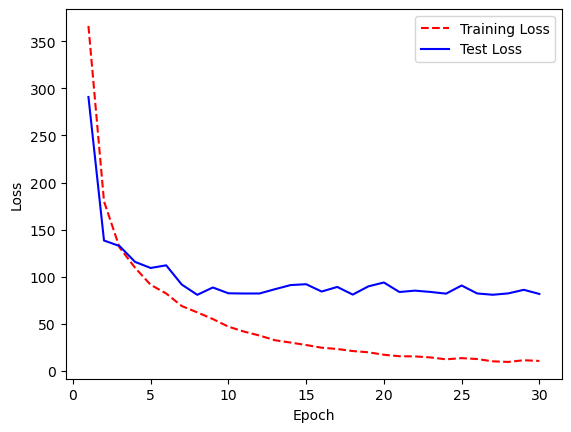

In [40]:
# Get training and test loss histories
training_loss = age_model.history['loss']
test_loss = age_model.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();
